In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

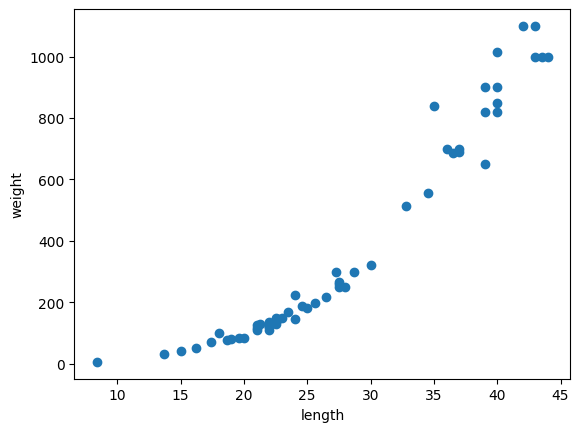

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [3]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [5]:
study_arr = np.array([1,2,3,4])
print(study_arr.shape)
print(study_arr.reshape(2,2))
print(study_arr.reshape(2,2).shape)
print(study_arr.reshape(-1,1))
print(study_arr.reshape(study_arr.size,1))
print(study_arr.reshape(-1,1).shape)

# ValueError: Expected 2D array, got 1D array instead:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

(4,)
[[1 2]
 [3 4]]
(2, 2)
[[1]
 [2]
 [3]
 [4]]
[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [7]:
# 훈련
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
#knr = KNeighborsRegressor(n_neighbors=5)
knr = KNeighborsRegressor()
knr.n_neighbors = 5 # 하이퍼파라미터 튜닝, 1, 3, 5, 7
knr.fit(train_input, train_target)

# 모델의 평가
# 좋은 모델 = score -> train > test
# train < test => 과소적합
knr.score(test_input, test_target)
# 0.99 ( 결정계수 )
knr.score(train_input, train_target)
# 0.96

#### 수동 예측
t_input = test_input[2]
p = knr.predict(t_input.reshape(1, -1))

print(f"예측 사용 무게:{p}")
print(f"실 무게:{test_target[2]}")

#### 그래프로 그려보기
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

예측 사용 무게:[248.]
실 무게:250.0


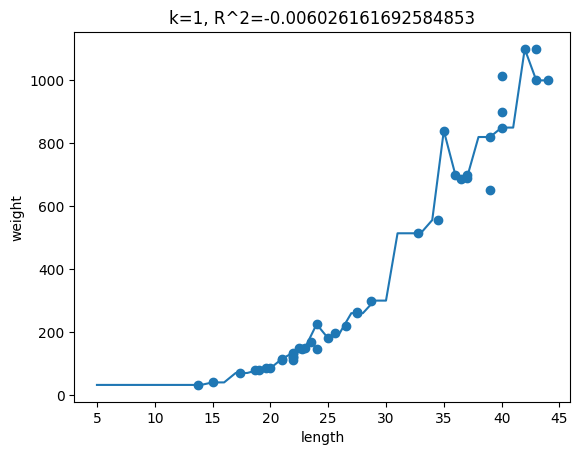

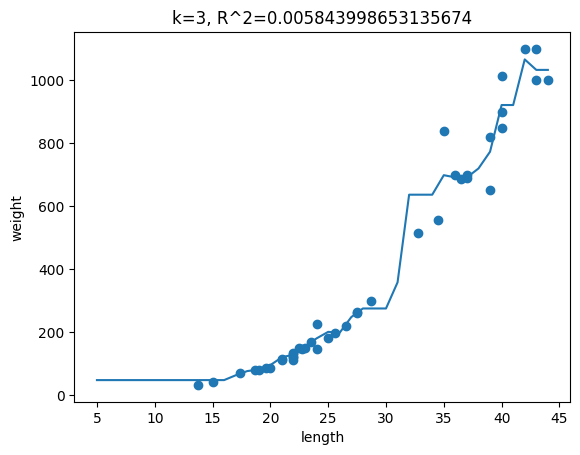

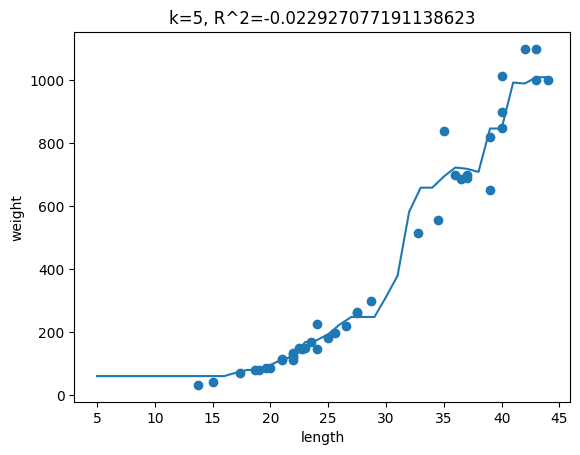

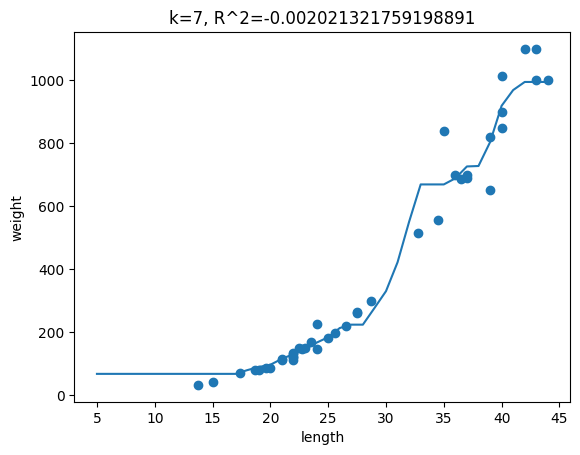

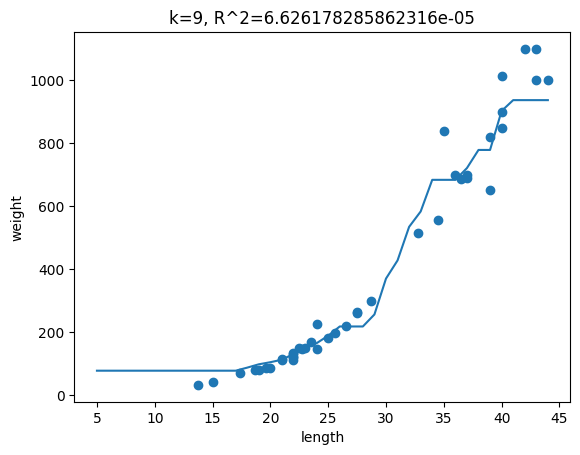

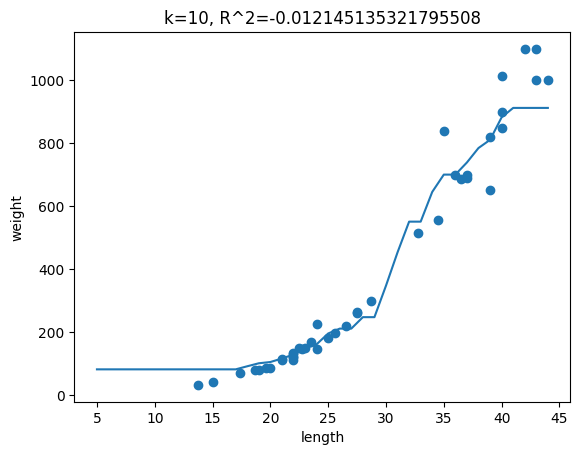

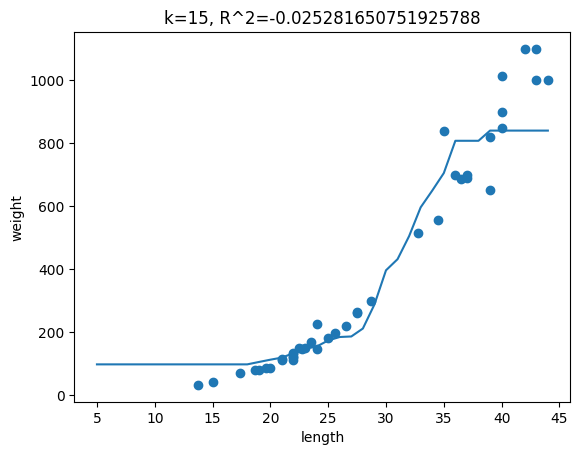

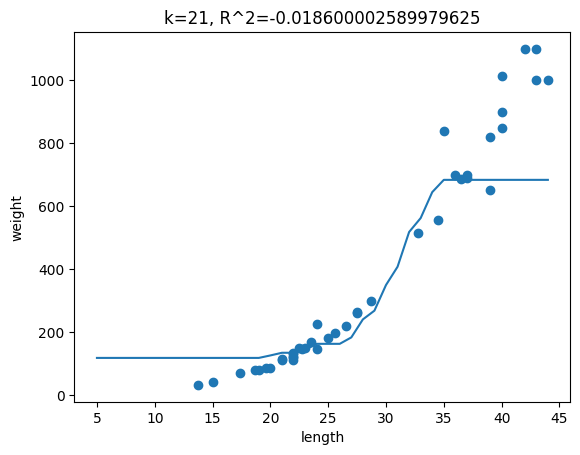

In [8]:

for k in [1, 3, 5, 7, 9, 10, 15, 21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    # 결정R^2
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)
    
    plt.title(f'k={k}, R^2={s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [9]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[34]]))
print(knr.predict([[45]]))
print(knr.predict([[46]]))
print(knr.predict([[47]]))
print(knr.predict([[48]]))
print(knr.predict([[49]]))
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[636.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]


[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]


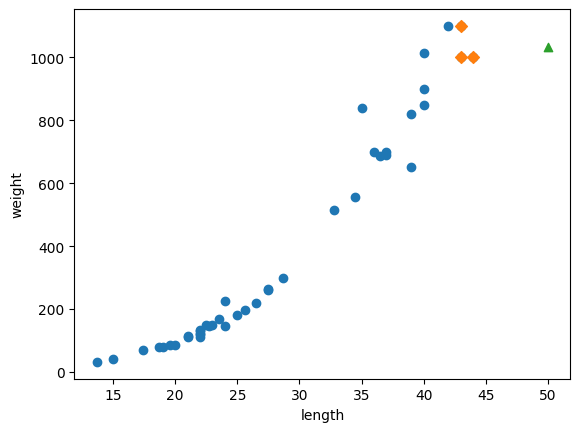

[[34  8 14]]


In [10]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[42]]))
print(knr.predict([[43]])) # 여기서 부터 예측 값이 같음 - 예측 범위를 갖고있음
print(knr.predict([[50]])) # 다른 알고리즘이 필요하다
print(knr.predict([[100]])) # 1033.33333333

### 이웃을 찾아 차트로 그리기
w = 50 # 100, 43, 42, 150, 41, 39 ... 값을 바꾸어 그려보기
d, i = knr.kneighbors([[w]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D') # 이웃 3
plt.scatter(w, knr.predict([[w]])[0], marker='^') # 50 이상인값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(i) ### 이것도 확인